# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data collection and analysis

In [2]:
#loading the data from csv file to a pandas dataframe
customer_data = pd.read_csv('./Mall_Customers.csv')

In [4]:
#print first 5 rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# finding number of rows and columns
customer_data.shape

(200, 5)

In [6]:
# get insight from dataset - understanding the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 200 non-null values means no missing values

In [7]:
# checking for missinng values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

if we have missing values than we will use imputation method in which we replace missing values with suitable values

## Choosing Annual Income Column and Spending Score Column

In [8]:
X=customer_data.iloc[:,[3,4]].values # if we ':' don't take these than it will consider it for row - slicing 

## Choosing the number of clusters we can form from our datasets

WCSS-> Within Cluster Sum of Squares 
 * Tend to find distance between each data points and their centroids
 * x - annual income, y - spending score
 * Each cluster has its own centroid

In [9]:
# finding wcss value for different number of clusters
wcss=[]

for i in range(1,11):
    k_means=KMeans(n_clusters=i, init='k-means++',random_state=42)
    k_means.fit(X)
    
    wcss.append(k_means.inertia_)

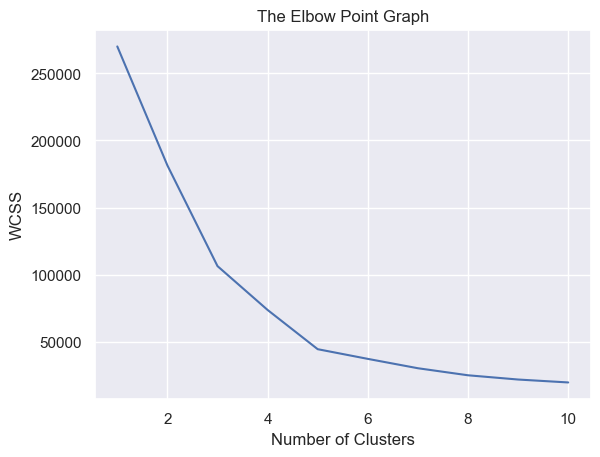

In [11]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Alse called cut-off point graph
We will see elbow points, elbow-points are the points at which there is sharp drop in values. Here, **3** & **5** are the two elbow points. 

We will choose **5** for number of clusters for this dataset as there is no sharp drop after this.

#### Optimum number of cluster = 5
Training the K-Means Clustering Model - Unsupervised learning

In [12]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

# return a label point for each data point based on their cluster
Y = kmeans.fit_predict(X)

In [13]:
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualizing all the clusters

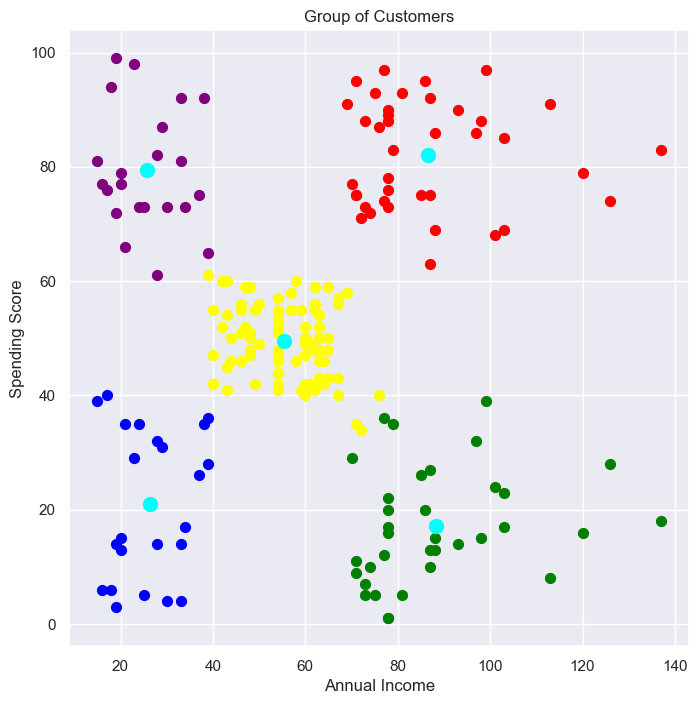

In [14]:
#plotting all the clusters and centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids') 
# 0 represents- X axis, 1-represents - Y axis

plt.title('Group of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

 **What we can get from this ?** 
  * How malls can increase their sales
   - By bringing membership cards for people who are not buying too much. Discounts, offers,etc.. 